# Roporte del modelo

In [2]:
# Librerías
import pandas as pd


In [1]:
# Cargar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar base csv
df = pd.read_csv('/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/df_combined_all_years_2020_24.csv')

/tmp/ipython-input-2487513603.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/df_combined_all_years_2020_24.csv')


### Información de la base

In [4]:
# Muestra de los registros
df.sample(10)

,ARMAS_MEDIOS,FECHA,CANTIDAD,TIPO_DELITO,GENERO,AGRUPA_EDAD_PERSONA,DELITO,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud,AÑO,ÁREA GEOGRÁFICA,TOTAL
4992692,ARMA BLANCA / CORTOPUNZANTE,2024-02-02,1.0,HURTO A PERSONAS,FEMENINO,ADULTOS,NaN,73,TOLIMA,73408,LÉRIDA,Municipio,"-74,910716","4,862046",2023.0,NaN,18555.0
5153141,SIN EMPLEO DE ARMAS,2024-11-17,2.0,LESIONES PERSONALES,FEMENINO,ADULTOS,NaN,85,CASANARE,85001,YOPAL,Municipio,"-72,396132","5,327102",2024.0,NaN,192468.0
1567563,SIN EMPLEO DE ARMAS,2021-10-14 00:00:00,1.0,HURTO A PERSONAS,FEMENINO,ADOLESCENTES,NaN,25,CUNDINAMARCA,25430,MADRID,Municipio,"-74,265854","4,732791",2021.0,Total,127066.0
5056058,ARMA DE FUEGO,2024-12-10,1.0,HURTO A PERSONAS,MASCULINO,ADULTOS,NaN,76,VALLE DEL CAUCA,76248,EL CERRITO,Municipio,"-76,311972","3,684229",2023.0,NaN,56919.0
4920393,ARMA BLANCA / CORTOPUNZANTE,2023-11-24,1.0,HURTO A PERSONAS,MASCULINO,ADULTOS,NaN,70,SUCRE,70400,LA UNIÓN,Municipio,"-75,276056","8,853975",2023.0,NaN,23399.0
1438252,SIN EMPLEO DE ARMAS,2022-09-22,2.0,HURTO A PERSONAS,FEMENINO,ADULTOS,NaN,25,CUNDINAMARCA,25214,COTA,Municipio,"-74,102569","4,812564",2022.0,Total,43488.0
672203,NO REPORTADO,2020-02-26,1.0,DELITOS SEXUALES,MASCULINO,ADULTOS,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,8,ATLÁNTICO,8638,SABANALARGA,Municipio,"-74,921256","10,632091",2022.0,Total,9621.0
502585,SIN EMPLEO DE ARMAS,2020-12-15,1.0,DELITOS SEXUALES,FEMENINO,ADULTOS,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,5,ANTIOQUIA,5660,SAN LUIS,Municipio,"-74,993619","6,043017",2020.0,Total,13475.0
21887,CONTUNDENTES,2020-01-03,1.0,AMENAZAS,FEMENINO,ADOLESCENTES,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",2022.0,Total,2514709.0
4884681,SIN EMPLEO DE ARMAS,2023-12-03,1.0,AMENAZAS,MASCULINO,ADULTOS,NaN,68,SANTANDER,68705,SANTA BÁRBARA,Municipio,"-72,907445","6,990996",2024.0,NaN,29171.0


In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217120 entries, 0 to 5217119
Data columns (total 17 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   ARMAS_MEDIOS                                     object 
 1   FECHA                                            object 
 2   CANTIDAD                                         float64
 3   TIPO_DELITO                                      object 
 4   GENERO                                           object 
 5   AGRUPA_EDAD_PERSONA                              object 
 6   DELITO                                           object 
 7   Código Departamento                              int64  
 8   Nombre Departamento                              object 
 9   Código Municipio                                 int64  
 10  Nombre Municipio                                 object 
 11  Tipo: Municipio / Isla / Área no municipalizada  object 
 12  longitud      

In [5]:
# Datos faltantes
df.isna().sum()

,0
ARMAS_MEDIOS,1659
FECHA,228
CANTIDAD,228
TIPO_DELITO,228
GENERO,561126
AGRUPA_EDAD_PERSONA,554334
DELITO,4855171
Código Departamento,0
Nombre Departamento,0
Código Municipio,0


## Diseño de dimensiones





El primer paso es inspeccionar las columnas, los tipos de datos y los datos de muestra del marco de datos para identificar posibles dimensiones para el esquema en estrella. Hecho en la sección anterior.



## Creación de las tablas de dimensiones


Para cada dimensión identificada, se crea un nuevo marco de datos que contenga valores únicos y una clave principal generada.


In [7]:
dim_arma_medio = df[['ARMAS_MEDIOS']].drop_duplicates().reset_index(drop=True)
dim_arma_medio['id_arma_medio'] = dim_arma_medio.index

dim_tipo_delito = df[['TIPO_DELITO']].drop_duplicates().reset_index(drop=True)
dim_tipo_delito['id_tipo_delito'] = dim_tipo_delito.index

dim_genero = df[['GENERO']].drop_duplicates().reset_index(drop=True)
dim_genero['id_genero'] = dim_genero.index

dim_agrupa_edad_persona = df[['AGRUPA_EDAD_PERSONA']].drop_duplicates().reset_index(drop=True)
dim_agrupa_edad_persona['id_agrupa_edad_persona'] = dim_agrupa_edad_persona.index

dim_delito = df[['DELITO']].drop_duplicates().reset_index(drop=True)
dim_delito['id_delito'] = dim_delito.index

dim_ubicacion = df[['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada']].drop_duplicates().reset_index(drop=True)
dim_ubicacion['id_ubicacion'] = dim_ubicacion.index

dim_año = df[['AÑO']].drop_duplicates().reset_index(drop=True)
dim_año['id_año'] = dim_año.index

dim_area_geografica = df[['ÁREA GEOGRÁFICA']].drop_duplicates().reset_index(drop=True)
dim_area_geografica['id_area_geografica'] = dim_area_geografica.index

df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
dim_fecha = df[['FECHA']].drop_duplicates().dropna().reset_index(drop=True)
dim_fecha['id_fecha'] = dim_fecha.index

display(dim_arma_medio.head())
display(dim_tipo_delito.head())
display(dim_genero.head())
display(dim_agrupa_edad_persona.head())
display(dim_delito.head())
display(dim_ubicacion.head())
display(dim_año.head())
display(dim_area_geografica.head())
display(dim_fecha.head())

,ARMAS_MEDIOS,id_arma_medio
0,ARMA DE FUEGO,0
1,PALANCAS,1
2,ARMA BLANCA / CORTOPUNZANTE,2
3,SIN EMPLEO DE ARMAS,3
4,BICICLETA,4


,TIPO_DELITO,id_tipo_delito
0,HURTO PIRATERÍA TERRESTRE,0
1,SECUESTRO,1
2,HOMICIDIO EN ACCIDENTE DE TRÁNSITO,2
3,VIOLENCIA INTRAFAMILIAR,3
4,HURTO A PERSONAS,4


,GENERO,id_genero
0,NaN,0
1,FEMENINO,1
2,MASCULINO,2
3,NO REPORTA,3
4,NO RESPORTADO,4


,AGRUPA_EDAD_PERSONA,id_agrupa_edad_persona
0,NaN,0
1,MENORES,1
2,ADULTOS,2
3,ADOLESCENTES,3
4,NO REPORTA,4


,DELITO,id_delito
0,NaN,0
1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,1
2,ARTÍCULO 206. ACTO SEXUAL VIOLENTO,2
3,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,3
4,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,4


,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,id_ubicacion
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,0
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,1
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,2
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,3
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,4


,AÑO,id_año
0,2020.0,0
1,2021.0,1
2,2022.0,2
3,NaN,3
4,2023.0,4


,ÁREA GEOGRÁFICA,id_area_geografica
0,Total,0
1,NaN,1


,FECHA,id_fecha
0,2020-08-21,0
1,2020-10-14,1
2,2020-11-18,2
3,2020-12-22,3
4,2020-03-18,4


## Tabla de hechos (fact table)


Se identifican las columnas de hechos y se crea un nuevo marco de datos para la tabla de hechos, reemplazando las columnas de dimensión originales con las nuevas claves principales de las tablas de dimensión.

Se crea la tabla de hechos seleccionando las columnas especificadas y luego se combinan con cada tabla de dimensión para reemplazar las columnas de dimensión originales con sus respectivas claves principales.


In [8]:
fact_table = df[['CANTIDAD', 'longitud', 'Latitud', 'TOTAL', 'ARMAS_MEDIOS', 'TIPO_DELITO', 'GENERO', 'AGRUPA_EDAD_PERSONA', 'DELITO', 'Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada', 'AÑO', 'ÁREA GEOGRÁFICA', 'FECHA']].copy()

fact_table = pd.merge(fact_table, dim_arma_medio, on='ARMAS_MEDIOS', how='left')
fact_table = fact_table.drop('ARMAS_MEDIOS', axis=1)

fact_table = pd.merge(fact_table, dim_tipo_delito, on='TIPO_DELITO', how='left')
fact_table = fact_table.drop('TIPO_DELITO', axis=1)

fact_table = pd.merge(fact_table, dim_genero, on='GENERO', how='left')
fact_table = fact_table.drop('GENERO', axis=1)

fact_table = pd.merge(fact_table, dim_agrupa_edad_persona, on='AGRUPA_EDAD_PERSONA', how='left')
fact_table = fact_table.drop('AGRUPA_EDAD_PERSONA', axis=1)

fact_table = pd.merge(fact_table, dim_delito, on='DELITO', how='left')
fact_table = fact_table.drop('DELITO', axis=1)

fact_table = pd.merge(fact_table, dim_ubicacion, on=['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada'], how='left')
fact_table = fact_table.drop(['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada'], axis=1)

fact_table = pd.merge(fact_table, dim_año, on='AÑO', how='left')
fact_table = fact_table.drop('AÑO', axis=1)

fact_table = pd.merge(fact_table, dim_area_geografica, on='ÁREA GEOGRÁFICA', how='left')
fact_table = fact_table.drop('ÁREA GEOGRÁFICA', axis=1)

fact_table = pd.merge(fact_table, dim_fecha, on='FECHA', how='left')
fact_table = fact_table.drop('FECHA', axis=1)

display(fact_table.head())

,CANTIDAD,longitud,Latitud,TOTAL,id_arma_medio,id_tipo_delito,id_genero,id_agrupa_edad_persona,id_delito,id_ubicacion,id_año,id_area_geografica,id_fecha
0,1.0,"-75,581775","6,246631",2489955.0,0,0,0,0,0,0,0,0,0.0
1,1.0,"-75,581775","6,246631",2507620.0,0,0,0,0,0,0,1,0,0.0
2,1.0,"-75,581775","6,246631",2514709.0,0,0,0,0,0,0,2,0,0.0
3,1.0,"-75,581775","6,246631",2489955.0,0,0,0,0,0,0,0,0,1.0
4,1.0,"-75,581775","6,246631",2507620.0,0,0,0,0,0,0,1,0,1.0




* Las posibles columnas de dimensión identificadas incluyen "ARMAS\_MEDIOS", "FECHA", "TIPO\_DELITO", "GÉNERO", "AGRUPA\_EDAD\_PERSONA", "DELITO", las columnas geográficas "AÑO" y "ÁREA GEOGRÁFICA".
* Las posibles columnas de hechos identificadas incluyen "CANTIDAD", "Longitud", "Latitud" y "TOTAL".
* Se crearon correctamente tablas de dimensiones para cada dimensión identificada, que contienen valores únicos y una clave primaria generada.
* La tabla de hechos se creó seleccionando las columnas de hechos y reemplazando las columnas de dimensión originales con las claves primarias de las tablas de dimensiones mediante operaciones de fusión.




### Esquema generado

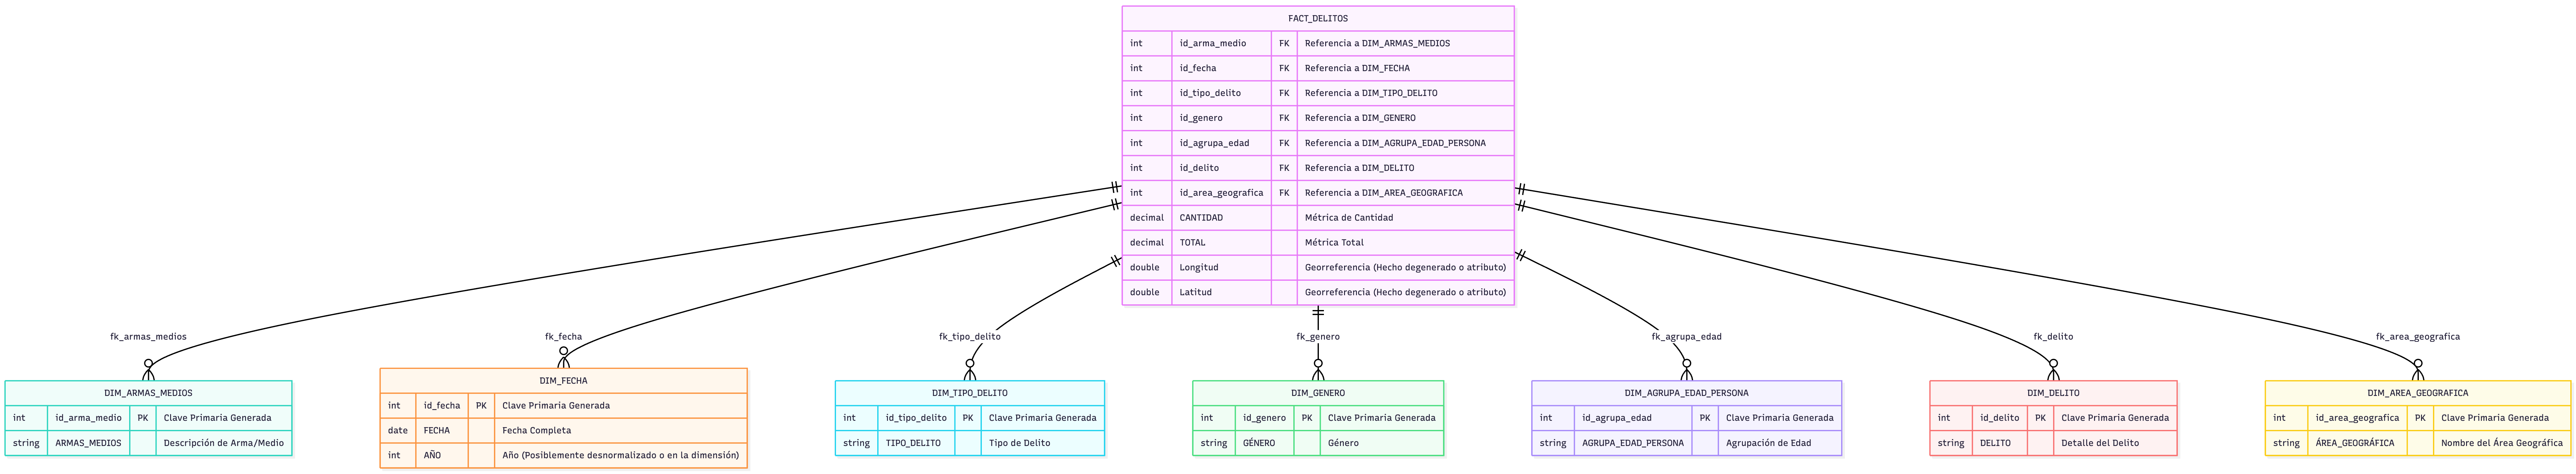

In [10]:
from IPython.display import Image, display

try:
  # Replace with the actual path to your image file in Google Drive
  image_path = '/content/drive/MyDrive/Consultoria/Datos-abiertos-Seguridad-y-Convivencia/notebooks/diagrama_esquema.png'
  display(Image(filename=image_path))
except FileNotFoundError:
  print(f"Error: The file was not found at {image_path}")
except Exception as e:
  print(f"An error occurred: {e}")

## Reporte General del Cuaderno

Este cuaderno tiene como objetivo principal la preparación de datos para la creación de un esquema estrella (star schema) a partir de un conjunto de datos sobre seguridad y convivencia.

Los pasos realizados incluyen:

1.  **Carga de datos**: Se cargó el archivo CSV `df_combined_all_years_2020_24.csv` desde Google Drive en un DataFrame de pandas.
2.  **Exploración inicial**: Se realizó una inspección inicial de los datos para entender su estructura, tipos de datos (`df.info()`) y la presencia de valores faltantes (`df.isna().sum()`). También se mostraron algunas filas de ejemplo (`df.sample(10)`).
3.  **Diseño y creación de tablas de dimensiones**: Se identificaron las columnas que podrían servir como dimensiones para el esquema estrella (`ARMAS_MEDIOS`, `FECHA`, `TIPO_DELITO`, `GENERO`, `AGRUPA_EDAD_PERSONA`, `DELITO`, columnas geográficas, `AÑO`, `ÁREA GEOGRÁFICA`). Para cada una de estas dimensiones, se crearon DataFrames separados conteniendo valores únicos y se les asignó una clave primaria (`id_...`).
4.  **Creación de la tabla de hechos**: Se identificaron las columnas que representan los hechos o medidas (`CANTIDAD`, `longitud`, `Latitud`, `TOTAL`). Se creó una tabla de hechos (DataFrame) y se fusionó con las tablas de dimensiones para reemplazar las columnas de dimensión originales con sus respectivas claves primarias.
5. **Visualización del esquema (Intento)**: Se intentó mostrar un diagrama del esquema utilizando una imagen almacenada en Google Drive.

